In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import math

In [2]:
def init_pos(taille):
    liste_tupple = []
    plateau = taille*taille 
    for i in range(taille):
        for j in range(taille):
            liste_tupple.append((i,j))
    return liste_tupple

In [3]:
def liste_langue(nbr_langue):
    liste_langue = []
    i = 0
    for i in range(nbr_langue):
        liste_langue.append(0)
    return liste_langue

In [4]:
pos = init_pos(15)
langue = liste_langue(4)

In [5]:
def pos1(pos):
    i=0
    i2 = 0
    nbr_pop=[]
    s= set()
    n2 = 0
    for e in range(len(langue)):
        l=random.randint(0,len(pos)-1)
        while l in s:
            l=random.randint(0,len(pos)-1)
       
        s.add(l)  
    return s

In [6]:
rep = pos1(pos)
rep

{48, 51, 176, 214}

In [7]:
langue

[0, 0, 0, 0]

In [8]:
def init_pop(pos, langue, s):
    pop = dict()

    for e in pos: 
            
        pop[e] = langue.copy()
        
        
    return pop


In [9]:
pop = init_pop(pos, langue, pos1(pos))

In [10]:
def repartion_init_langues(pop, s):
    a = 0
    i = 0
    for e in pop:
        if i in s:           
            (pop[e])[a] = random.randint(1000,20000)
            a = a + 1
        i = i+1
    return pop


In [11]:
finit = repartion_init_langues(pop, rep)
finit

{(0, 0): [0, 0, 0, 0],
 (0, 1): [0, 0, 0, 0],
 (0, 2): [0, 0, 0, 0],
 (0, 3): [0, 0, 0, 0],
 (0, 4): [0, 0, 0, 0],
 (0, 5): [0, 0, 0, 0],
 (0, 6): [0, 0, 0, 0],
 (0, 7): [0, 0, 0, 0],
 (0, 8): [0, 0, 0, 0],
 (0, 9): [0, 0, 0, 0],
 (0, 10): [0, 0, 0, 0],
 (0, 11): [0, 0, 0, 0],
 (0, 12): [0, 0, 0, 0],
 (0, 13): [0, 0, 0, 0],
 (0, 14): [0, 0, 0, 0],
 (1, 0): [0, 0, 0, 0],
 (1, 1): [0, 0, 0, 0],
 (1, 2): [0, 0, 0, 0],
 (1, 3): [0, 0, 0, 0],
 (1, 4): [0, 0, 0, 0],
 (1, 5): [0, 0, 0, 0],
 (1, 6): [0, 0, 0, 0],
 (1, 7): [0, 0, 0, 0],
 (1, 8): [0, 0, 0, 0],
 (1, 9): [0, 0, 0, 0],
 (1, 10): [0, 0, 0, 0],
 (1, 11): [0, 0, 0, 0],
 (1, 12): [0, 0, 0, 0],
 (1, 13): [0, 0, 0, 0],
 (1, 14): [0, 0, 0, 0],
 (2, 0): [0, 0, 0, 0],
 (2, 1): [0, 0, 0, 0],
 (2, 2): [0, 0, 0, 0],
 (2, 3): [0, 0, 0, 0],
 (2, 4): [0, 0, 0, 0],
 (2, 5): [0, 0, 0, 0],
 (2, 6): [0, 0, 0, 0],
 (2, 7): [0, 0, 0, 0],
 (2, 8): [0, 0, 0, 0],
 (2, 9): [0, 0, 0, 0],
 (2, 10): [0, 0, 0, 0],
 (2, 11): [0, 0, 0, 0],
 (2, 12): [0, 0, 0, 0]

In [25]:
def existe(tupl, finit):
    
    for i in finit[tupl]:
        if i>0: 
            return 1
            
    return 0

In [26]:
def ensemble(a):
    s = set()
    for (x,y) in a:
        if existe((x,y), a) == 1: 
            s.add((x,y))
            
    return s


In [27]:
def affect_array(dicto, size=3, nb_langues=1):
    """
    
    """
    array = np.empty((size, size, nb_langues))
    for index, values in dicto.items():
        array[index] = values
    
    return array

In [28]:
def expansion(finit, tupl):
    x, y = tupl
    x1 = len(finit)
    y1 = len(finit)
    
  
    j = 0

    
    for i in finit[(x,y)]:
            
        if i > 10: #utiliser les indices plutot que les cases non nuls
            while x+x1 < 0 or x+x1 >= math.sqrt(len(finit)) or y+y1 < 0 or y+y1>=math.sqrt(len(finit)):
                x1 = random.randint(-1,1)
                y1 = random.randint(-1,1)
            
            nb = int((random.randint(10,20)/100)*i)
            finit[(x,y)][j] = finit[(x,y)][j] - nb
            finit[(x+x1, y+y1)][j] = finit[(x+x1, y+y1)][j] + nb
        j = j+1
    
    return finit

In [29]:
def evolution_intra_case(finit,tupl):
    l=[]
    total_pop = 0
    if finit[tupl] != [0, 0, 0, 0]:
        for i in finit[tupl]:
            total_pop+=i
        if total_pop > 0 :
            for i in finit[tupl]:
                l.append(i/total_pop)
                
    # test= [lang > 0.5 for lang in l]
        for i in range(len(l)):
            if l[i]>0.55:
                for j in range(len(finit[tupl])):
                    if i!=j:
                        ## option: moving = finit[tupl][j] - int(finit[tupl][j]*0.9675)
                        finit[tupl][j]=int(finit[tupl][j]*0.96)
                for i2 in range(len(l)):
                    if i2!=i:
                        total_pop-=finit[tupl][i2]
                finit[tupl][i] = total_pop
    return finit

In [34]:
def naissance(finit, e):
    for i in range(len(finit[e])):
        if existe(e, finit) and finit[e][i]> 0:
            finit[e][i] = finit[e][i] + int((finit[e][i]*random.randint(-10, 30))/1000)
    return finit
    

In [35]:
def evolution(finit):
    
    s = ensemble(finit)
    for e in s:
        finit = evolution_intra_case(finit, e)
        expansion(finit, e)
        naissance(finit, e) 
        
    return finit


In [36]:
import copy

def generation(finit, n):
    i = 0
    etat = copy.deepcopy(finit)
    list_gen = [etat]
    
    for j in range(0, n):
        new_etat = evolution(etat)
        list_gen.append(new_etat)
        etat = copy.deepcopy(new_etat)
    
    return list_gen

In [37]:
test = generation(finit, 1000)

In [38]:
test[0]

{(0, 0): [0, 0, 0, 0],
 (0, 1): [0, 0, 0, 0],
 (0, 2): [0, 0, 0, 0],
 (0, 3): [0, 0, 0, 0],
 (0, 4): [0, 0, 0, 0],
 (0, 5): [0, 0, 0, 0],
 (0, 6): [0, 0, 0, 0],
 (0, 7): [0, 0, 0, 0],
 (0, 8): [0, 0, 0, 0],
 (0, 9): [0, 0, 0, 0],
 (0, 10): [0, 0, 0, 0],
 (0, 11): [0, 0, 0, 0],
 (0, 12): [0, 0, 0, 0],
 (0, 13): [0, 0, 0, 0],
 (0, 14): [0, 0, 0, 0],
 (1, 0): [0, 0, 0, 0],
 (1, 1): [0, 0, 0, 0],
 (1, 2): [0, 0, 0, 0],
 (1, 3): [0, 0, 0, 0],
 (1, 4): [0, 0, 0, 0],
 (1, 5): [0, 0, 0, 0],
 (1, 6): [0, 0, 0, 0],
 (1, 7): [0, 0, 0, 0],
 (1, 8): [0, 0, 0, 0],
 (1, 9): [0, 0, 0, 0],
 (1, 10): [0, 0, 0, 0],
 (1, 11): [0, 0, 0, 0],
 (1, 12): [0, 0, 0, 0],
 (1, 13): [0, 0, 0, 0],
 (1, 14): [0, 0, 0, 0],
 (2, 0): [0, 0, 0, 0],
 (2, 1): [0, 0, 0, 0],
 (2, 2): [0, 0, 0, 0],
 (2, 3): [0, 0, 0, 0],
 (2, 4): [0, 0, 0, 0],
 (2, 5): [0, 0, 0, 0],
 (2, 6): [0, 0, 0, 0],
 (2, 7): [0, 0, 0, 0],
 (2, 8): [0, 0, 0, 0],
 (2, 9): [0, 0, 0, 0],
 (2, 10): [0, 0, 0, 0],
 (2, 11): [0, 0, 0, 0],
 (2, 12): [0, 0, 0, 0]

In [44]:
def affiche(c):
    plateau = affect_array(test[c], int(math.sqrt(len(pos))), len(langue))
    fig, ax = plt.subplots(2, 2)
    im = ax[0, 0].imshow(plateau[:,:,0])
    ax[0,0].set_title("l1")
    im = ax[0, 1].imshow(plateau[:,:,1])
    ax[0,1].set_title("l2")
    im = ax[1, 0].imshow(plateau[:,:,2])
    ax[1,0].set_title("l3")
    im = ax[1, 1].imshow(plateau[:,:,3])
    ax[1,1].set_title("l4")
    fig.subplots_adjust(top=1.0)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    plt.show()
    

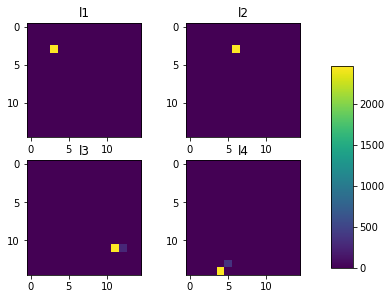

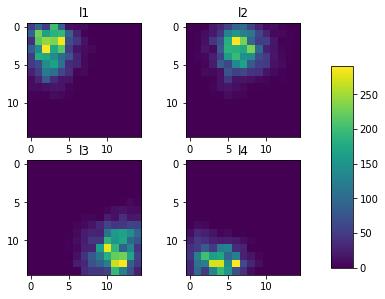

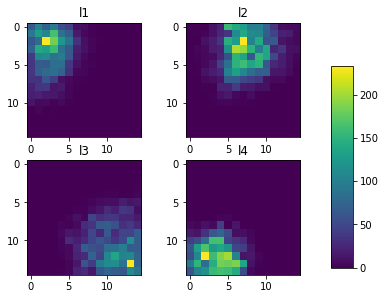

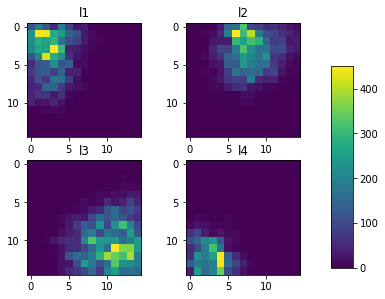

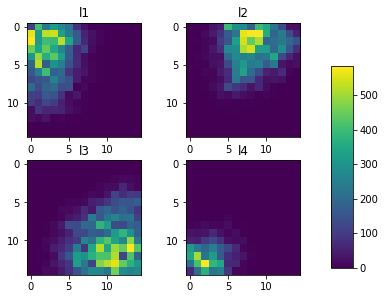

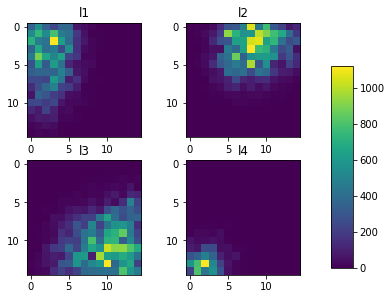

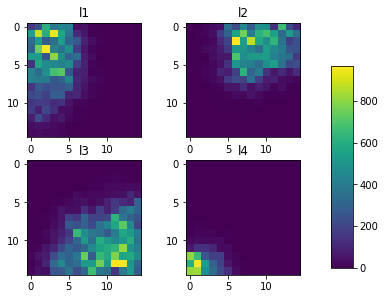

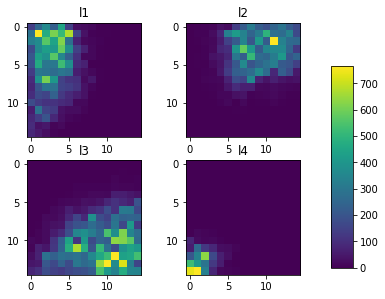

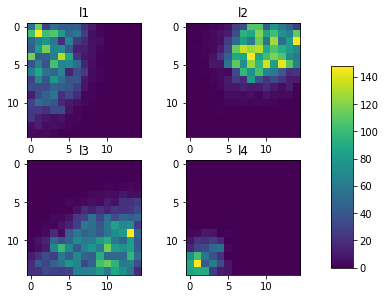

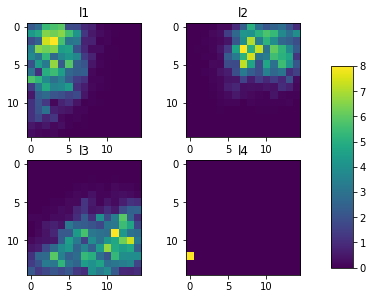

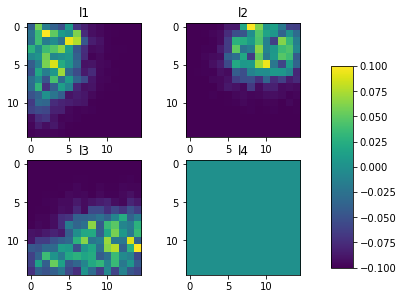

In [45]:
i = 0
while(i<=500):
    affiche(i)
    i = i + 50


In [42]:
def universelle(finit):
    l=[0,0,0,0]
    r=[0,0,0,0]
    res=[]
    j=0
    c=0
    for e in finit:
        for i in finit[e]:
            l[j] += i
            j+=1
        j=0
    
    for s in range(4):
        for f in finit:
            if finit[f][s]>50:
                c+=1
        r[s]=c
        c = 0
        
    for i in range(4):
        res.append(int(l[i]/255-r[i]))
    return (l,r,res)


In [43]:
universelle(test[500])

([1394949, 1199273, 1807035, 0], [168, 165, 188, 0], [5302, 4538, 6898, 0])